In [374]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [375]:
inf = float('nan')

# get sign of a number
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    elif x == 0:
        return 0
    else: # this covers NaN values
        return x

In [376]:
debug = False

# [LaserScan ROS Message Definition](http://docs.ros.org/api/sensor_msgs/html/msg/LaserScan.html)

Single scan from a planar laser range-finder

If you have another ranging device with different behavior (e.g. a sonar array), please find or create a different message, since applications will make fairly laser-specific assumptions about this data

### `Header header`
timestamp in the header is the acquisition time of the first ray in the scan
in frame frame_id, angles are measured around the positive Z axis (counterclockwise, if Z is up) with zero angle being forward along the x axis
                         
### `float32 angle_min`
start angle of the scan [rad]
### `float32 angle_max`
end angle of the scan [rad]
### `float32 angle_increment`
angular distance between measurements [rad]

### `float32 time_increment`
time between measurements [seconds] - if your scanner is moving, this will be used in interpolating position of 3d points
### `float32 scan_time`
time between scans [seconds]

### `float32 range_min`
minimum range value [m]
### `float32 range_max`
maximum range value [m]

### `float32[] ranges`
range data [m] (Note: values < range_min or > range_max should be discarded)
### `float32[] intensities`
intensity data [device-specific units].  If your device does not provide intensities, please leave the array empty.


In [377]:
from sensor_msgs.msg import LaserScan

In [378]:
## Example RPLIDAR output
scan = LaserScan()
scan.header.frame_id = 'laser_link'
scan.angle_min = -3.12413907051
scan.angle_max = 3.14159274101
scan.angle_increment = 0.0174532923847
scan.time_increment = 3.4000848359e-07
scan.scan_time = 0.000122063043818
scan.range_min = 0.5
# scan.range_min = 0.15000000596
scan.range_max = 6.0
scan.ranges = [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.8575000762939453, inf, inf, inf, 2.5647499561309814, inf, inf, 2.421250104904175, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.0537500381469727, 2.0532500743865967, 2.015500068664551, inf, 2.0027499198913574, 1.9667500257492065, 1.9322500228881836, 1.9197499752044678, inf, 1.9084999561309814, 1.875749945640564, 1.8767499923706055, 1.846500039100647, 1.8454999923706055, inf, 1.8312499523162842, 1.8250000476837158, 1.8147499561309814, 1.8012499809265137, inf, 1.7972500324249268, 1.7972500324249268, 1.78725004196167, 1.783750057220459, inf, 1.784000039100647, 1.780750036239624, 1.784000039100647, 1.781749963760376, inf, 1.7822500467300415, 1.783750057220459, 1.7834999561309814, 1.7999999523162842, inf, 1.778499960899353, 1.8022500276565552, 1.8055000305175781, inf, inf, inf, inf, inf, 1.8522499799728394, inf, inf, inf, 1.8545000553131104, inf, inf, inf, 1.912750005722046, 1.9112499952316284, 1.966249942779541, inf, 1.9667500257492065, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.257750004529953, 0.25999999046325684, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.23799991607666, 1.1762499809265137, inf, inf, inf, inf, 1.8209999799728394, 0.6000000238418579, 7.556000232696533, inf, inf, inf, inf, inf, 1.7137500047683716, 0.596750020980835, 0.3095000088214874, inf, inf, inf, inf, inf, inf, 5.3142499923706055, inf, 1.9329999685287476, 0.4494999945163727, 0.26124998927116394, inf, 0.20475000143051147, inf, inf, inf, inf, inf, inf, inf, 4.02400016784668, inf, 3.970249891281128, 3.878999948501587, 3.872499942779541, 3.8227500915527344, inf, 3.779750108718872, 3.7360000610351562, 3.726249933242798, 3.683500051498413, inf, 3.5985000133514404, 3.467250108718872, 3.461750030517578, 3.422499895095825, 3.4110000133514404, inf, 3.372999906539917, 3.3375000953674316, 3.3067500591278076, 3.3052499294281006, inf, 3.227250099182129, 3.2209999561309814, 3.2190001010894775, 3.208750009536743, inf, 3.2047500610351562, 3.2012500762939453, 3.150749921798706, 1.8485000133514404, 0.5764999985694885, 0.3634999990463257, 0.20424999296665192, 0.18449999392032623, 0.16725000739097595, 0.15324999392032623, 0.12325000017881393, inf, 0.13199999928474426, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.228749990463257, inf, 3.281749963760376, 3.3112499713897705, 3.3984999656677246, 3.407749891281128, inf, 3.6882500648498535, 3.4237499237060547, 3.4590001106262207, 3.530750036239624, inf, 3.601749897003174, 3.6112499237060547, 3.7304999828338623, 3.7715001106262207, inf, 3.7855000495910645, 3.8627500534057617, 3.877500057220459, 3.96875, inf, 4.013500213623047, 4.024750232696533, 4.071750164031982, inf, inf, 4.190999984741211, 0.8309999704360962, 0.35624998807907104, 0.3019999861717224, 0.18125000596046448, 0.1665000021457672, 0.15150000154972076, 0.14124999940395355, 0.12300000339746475, inf, inf, inf, 0.1197500005364418, inf, inf, inf, inf, inf, inf, inf]
scan.intensities = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 9.0, 0.0, 10.0, 11.0, 11.0, 11.0, 0.0, 14.0, 13.0, 15.0, 16.0, 16.0, 0.0, 18.0, 21.0, 22.0, 26.0, 0.0, 28.0, 31.0, 30.0, 32.0, 0.0, 28.0, 28.0, 30.0, 28.0, 0.0, 28.0, 25.0, 25.0, 23.0, 0.0, 41.0, 20.0, 19.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 14.0, 14.0, 11.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 10.0, 11.0, 12.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 13.0, 13.0, 13.0, 13.0, 0.0, 14.0, 13.0, 16.0, 16.0, 0.0, 17.0, 15.0, 17.0, 18.0, 18.0, 0.0, 17.0, 16.0, 17.0, 16.0, 0.0, 16.0, 17.0, 17.0, 18.0, 0.0, 17.0, 17.0, 17.0, 11.0, 12.0, 11.0, 12.0, 12.0, 11.0, 11.0, 10.0, 0.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 15.0, 15.0, 16.0, 15.0, 0.0, 14.0, 16.0, 16.0, 13.0, 0.0, 16.0, 16.0, 16.0, 15.0, 0.0, 14.0, 14.0, 15.0, 14.0, 0.0, 13.0, 13.0, 13.0, 0.0, 0.0, 13.0, 12.0, 11.0, 11.0, 10.0, 11.0, 11.0, 12.0, 10.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [379]:
print round((angle_max - angle_min + angle_increment)/angle_increment)

360.0


In [380]:
# generate an array with the scan angles associated with sequential points in a laser scan
def generate_scan_angles(angle_min, angle_max, angle_increment, yaw_offset=0):
    n_points = int(round((angle_max - angle_min + angle_increment)/angle_increment))
    angles = []
    for i in xrange(n_points):
        angle = wrap_angle(angle_min + i*angle_increment + yaw_offset)
        angles.append(angle)
    return angles

# wrap angle to interval [-pi, pi]
def wrap_angle(angle):
    while angle > math.pi:
        angle -= 2*math.pi
    while angle < -math.pi:
        angle += 2*math.pi
    # sanity check
    assert angle > -math.pi and angle < math.pi
    return angle
    

In [381]:
# plot a laser scan on a polar plot and compare the same scan with a nonzero yaw offset
def plot_scan_offset_comparison(scan, yaw_offset):
    
    angles = generate_scan_angles(scan.angle_min, scan.angle_max, scan.angle_increment)
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(121, polar=True)
    ax.plot(angles, scan.ranges, 'ob')
    ax.set_rmax(6)
    ax.grid(True)
    ax.set_title("LIDAR Scan", va='bottom')

    offset_angles = generate_scan_angles(scan.angle_min, scan.angle_max, scan.angle_increment, yaw_offset=yaw_offset)
    
    ax = plt.subplot(122, polar=True)
    ax.plot(offset_angles, scan.ranges, 'or')
    ax.set_rmax(6)
    ax.grid(True)

    ax.set_title("LIDAR Scan, Yaw Offset "+str(yaw_offset), va='bottom')
    plt.show()
    return plt

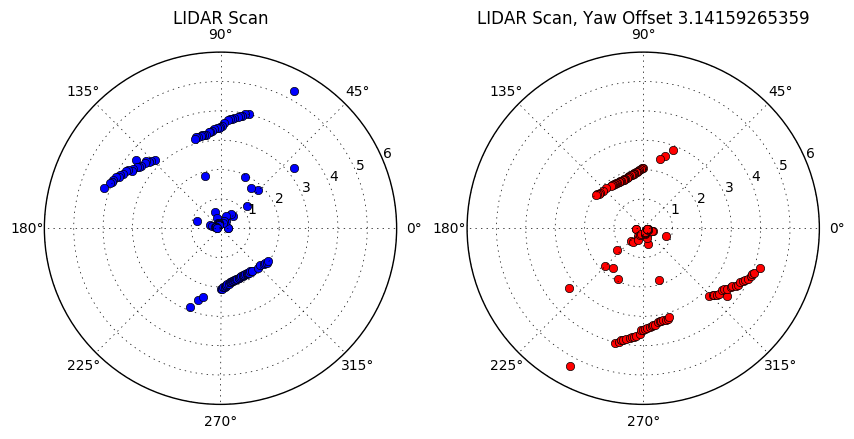

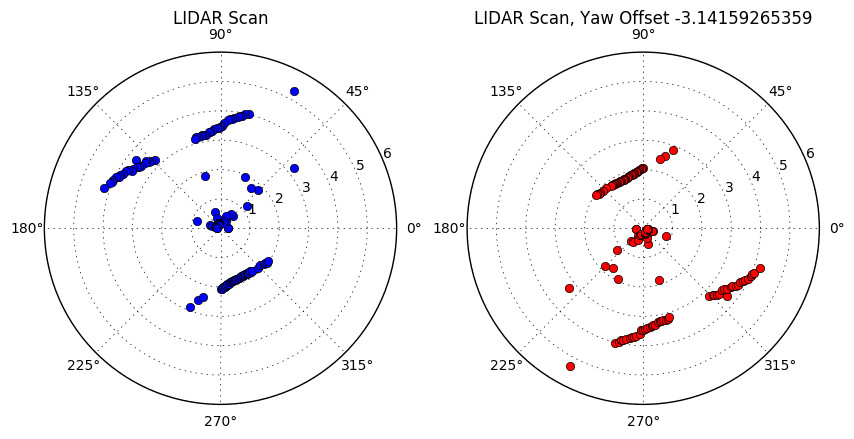

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [382]:
# mount LIDAR with yaw offset of +pi
plot_scan_offset_comparison(scan, math.pi)
# the result should be the same as with yaw offset of -pi
plot_scan_offset_comparison(scan, -math.pi)

In [433]:
'''
class Point():
    def __init__(self, angle, r, intensity):
        self.a = angle
        self.r = r
        self.i = intensity
'''

class Points():
    
    def __init__(self, point_list):
        if debug:
            print point_list
        if len(point_list) != 0:
            self.angles = point_list[0]
            self.ranges = point_list[1]
            self.intensities = point_list[2]
        else:
            self.angles = []
            self.ranges = []
            self.intensities = []
        
    def num_points(self):
        print str(len(self.ranges))+" valid points"
        return len(self.ranges)

    def is_empty(self):
        if len(self.ranges) == 0:
            return True
        else:
            return False
        

In [434]:
ps = Points([])

In [384]:
# check if point is OK
def point_ok(p, range_min, range_max):
    r = p[1]
    intensity = p[2]
    if math.isnan(r): # check for inf
        return False
    if r < 0:
        return False
    elif intensity <= 0.0: # this might not be necessary
        return False
    elif r < range_min or r > range_max: 
        return False
    else:
        return True
    
# return scan with invalid points given r = 'inf' and intensity = 0
def valid_points(angles, scan):
    # I feel like there has to be a better way
    valid = [p for p in zip(angles, scan.ranges, scan.intensities) if point_ok(p, scan.range_min, scan.range_max)]
    return Points([list(v) for v in zip(*valid)])

In [385]:
angles = generate_scan_angles(scan.angle_min, scan.angle_max, scan.angle_increment, yaw_offset=math.pi)
valid_points = valid_points(angles, scan)

In [386]:
# print out output for debugging
# print valid_points.angles
# print valid_points.ranges
# print valid_points.intensities

In [387]:
# compare valid and invalid scan points
def plot_valid_point_comparison(angles, scan, valid_points):
          
    plt.figure(figsize=(10,5))
    ax = plt.subplot(121, polar=True)
    ax.plot(angles, scan.ranges, 'ob')
    ax.set_rmax(6)
    ax.grid(True)
    ax.set_title("LIDAR Scan", va='bottom')

    ax = plt.subplot(122, polar=True)
    ax.plot(valid_points.angles, valid_points.ranges, 'or')
    ax.set_rmax(6)
    ax.grid(True)
    ax.set_title("Valid Points", va='bottom')

    plt.show()
    return plt

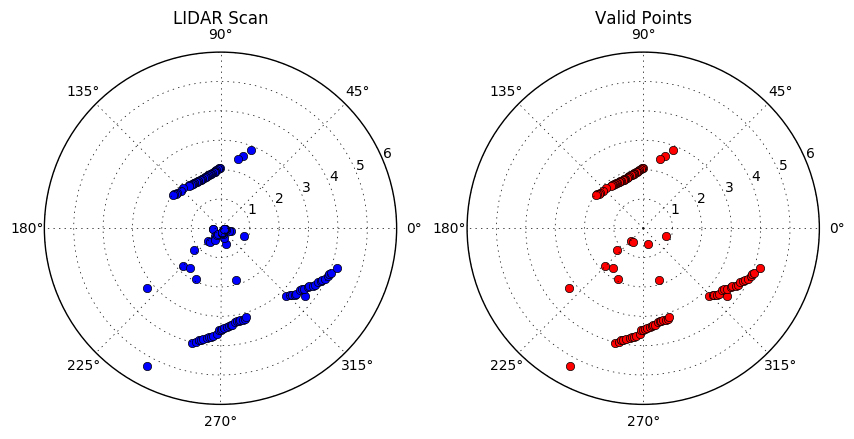

97 valid points


97

In [388]:
plot_valid_point_comparison(angles, scan, valid_points)

# check number of valid points
valid_points.num_points()


# plot_valid_point_comparison(scan, yaw_offset=math.pi)

In [389]:
# plot a laser scan on a polar plot and compare the same scan with a nonzero yaw offset
def plot_ranges(ranges, title):
          
    plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    ax.plot(xrange(len(ranges)), ranges, '.r')
    ax.grid(True)
    ax.set_title(title, va='bottom')

#     ax = plt.subplot(122, polar=True)
#     ax.plot(valid_points.angles, valid_points.ranges, 'or')
#     ax.set_rmax(6)
#     ax.grid(True)
#     ax.set_title("Valid Points", va='bottom')

#     plt.show()
#     return plt



In [422]:

def narrow_fov(points, yaw_min=-math.pi/2, yaw_max=math.pi/2):
    narrow = [p for p in zip(points.angles, points.ranges, points.intensities) if yaw_min < p[0] < yaw_max and point_ok(p, scan.range_min, scan.range_max)]
    return Points([list(n) for n in zip(*narrow)])

In [416]:
narrow_points = narrow_fov(valid_points)


In [417]:
# compare two sets of points
def plot_point_comparison(point_class_1, point_class_2, title1='Some Points', title2='Some Other Points'):
          
    plt.figure(figsize=(10,5))
    ax = plt.subplot(121, polar=True)
    ax.plot(point_class_1.angles, point_class_1.ranges, 'ob')
    ax.set_rmax(6)
    ax.grid(True)
    ax.set_title(title1, va='bottom')

    ax = plt.subplot(122, polar=True)
    ax.plot(point_class_2.angles, point_class_2.ranges, 'or')
    ax.set_rmax(6)
    ax.grid(True)
    ax.set_title(title2, va='bottom')

    plt.show()
    return plt

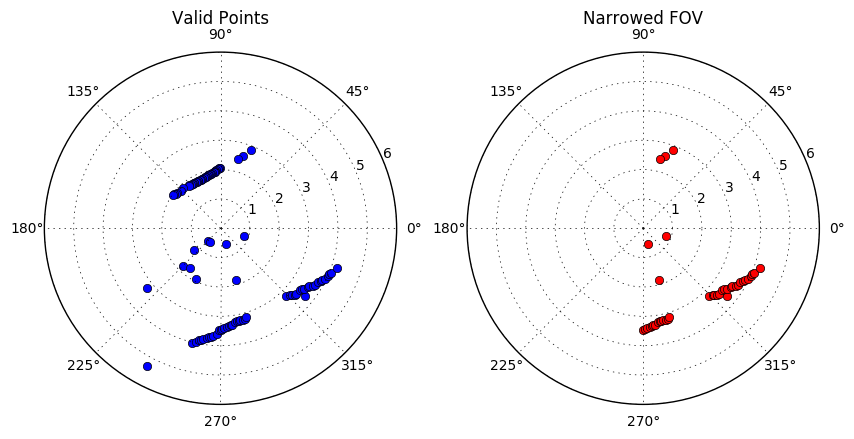

[1.204277465239393, 1.274090634778193, 1.3264505119322931, 1.570796605318093, 1.588249897702793, 1.605703190087493, 1.640609774856893, 1.658063067241593, 1.675516359626293, 1.692969652010993, 1.727876236780393, 1.745329529165093, 1.762782821549793, 1.780236113934493, 1.797689406319193, 1.832595991088593, 1.8500492834732931, 1.867502575857993, 1.884955868242693, 1.9198624530120931, 1.937315745396793, 1.954769037781493, 1.972222330166193, 2.007128914935593, 2.024582207320293, 2.042035499704993, 2.059488792089693, 2.094395376859093, 2.111848669243793, 2.129301961628493, 2.146755254013193, 2.1816618387825932, 2.199115131167293, 2.216568423551993, 2.321288177860193, 2.391101347398993, 2.460914516937793, 2.478367809322493, 2.495821101707193, 2.530727686476593, -2.460913984235193, -2.4434606918504933, -2.3561942299269933, -2.338740937542293, -2.216567890849393, -2.1991145984646936, -2.059488259387093, -2.0245816746176937, -1.8151421660012934, -1.780235581231893, -1.762782288847193, -1.7453289

In [423]:
plot_point_comparison(valid_points, narrow_points, 'Valid Points', 'Narrowed FOV')

print valid_points.angles
print narrow_points.angles

In [427]:

def polar_integrate(narrow):
    integral = 0;
    dirintegral = 0;
    for p in zip(narrow.angles, narrow.ranges, narrow.intensities):
        yaw = p[0]
        r = p[1]
        # use -= because we want to steer away from points
        dirintegral -= sign(yaw) * (1/r) * math.cos(yaw)
        integral += (1/r) * math.cos(yaw)
        #print r, yaw
    print("integral %4.1f, dirintegral %4.1f, dirintegral/integral %4.1f", integral, dirintegral, dirintegral/integral) 
    return dirintegral/integral

def steer(scan, yaw_offset, yaw_min=-math.pi/2, yaw_max=math.pi/2):
    angles = generate_scan_angles(scan.angle_min, scan.angle_max, scan.angle_increment, yaw_offset=yaw_offset)
    scan_points = Points([angles, scan.ranges, scan.intensities])
    narrow_points = narrow_fov(scan_points, yaw_min, yaw_max)
    if narrow_points.is_empty():
        drive_angle = 0 
    else:
        drive_angle = polar_integrate(narrow_points)
    print drive_angle
    return narrow_points, drive_angle

In [428]:


def steer_plot(scan, yaw_offset, yaw_min=-math.pi/2, yaw_max=math.pi/2):
    
    narrow, steer_angle = steer(scan, yaw_offset, yaw_min=yaw_min, yaw_max=yaw_max)
    
    plt.figure(figsize=(20,10))

    ax = plt.subplot(111, polar=True)
    ax.plot(narrow.angles, narrow.ranges, 'ob')

    vecr = [0, 2]
    vectheta = [steer_angle, steer_angle]
    ax.plot(vectheta, vecr, 'r', linewidth=2)

    ax.set_rmax(6)
    ax.grid(True)

    ax.set_title("Steering Angle: %3.1f Degrees" % (np.rad2deg(steer_angle)), va='bottom')
    plt.show()


('integral %4.1f, dirintegral %4.1f, dirintegral/integral %4.1f', 12.185782618456434, 3.279125425006305, 0.2690943641190335)
0.269094364119


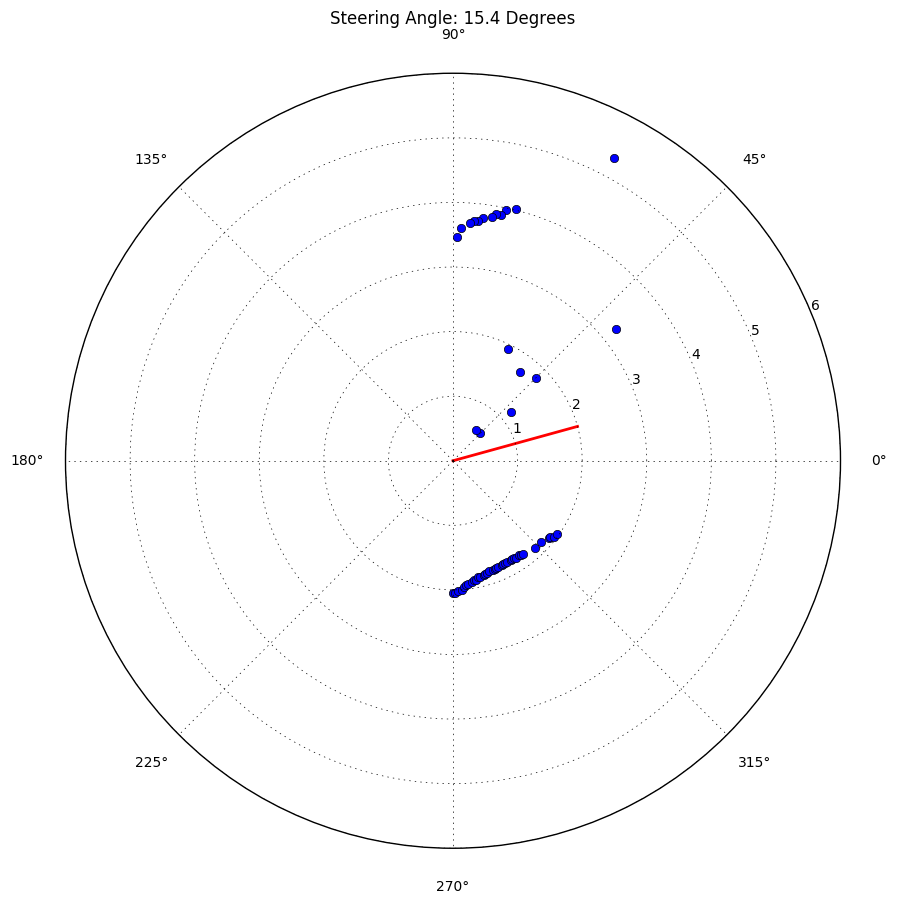

('integral %4.1f, dirintegral %4.1f, dirintegral/integral %4.1f', 7.5176580899547005, 6.839007914627832, 0.9097258524920547)
0.909725852492


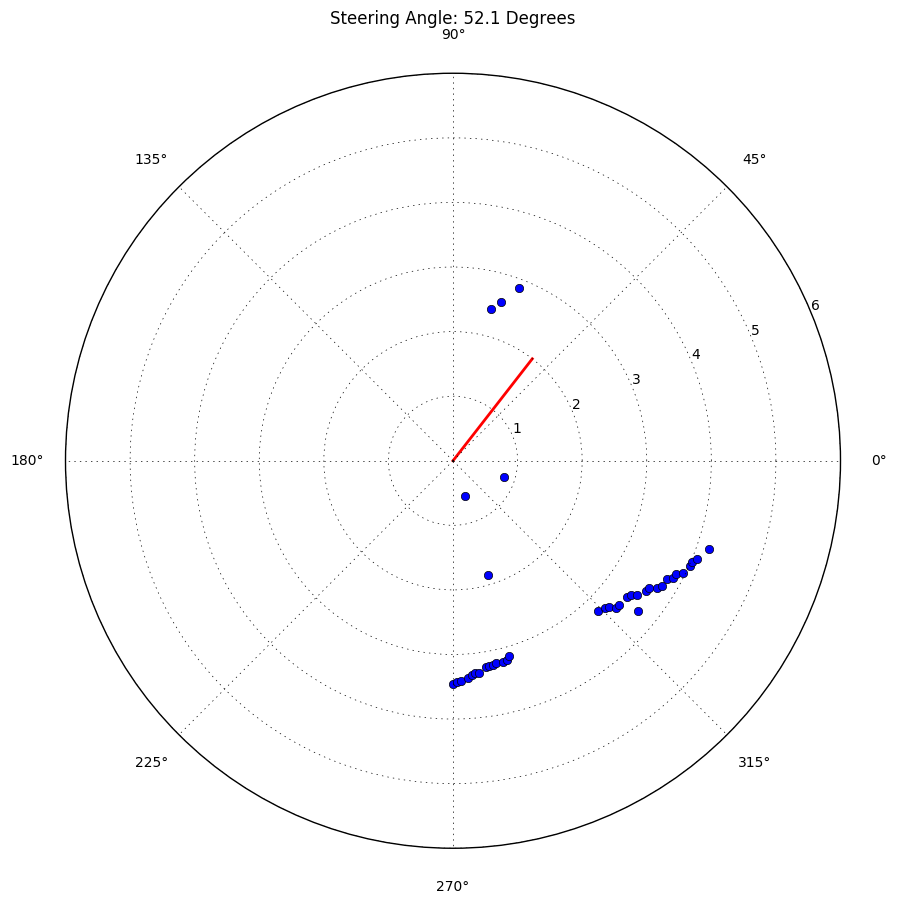

In [429]:
steer_plot(scan, 0, yaw_min=-math.pi/2, yaw_max=math.pi/2)
steer_plot(scan, math.pi, yaw_min=-math.pi/2, yaw_max=math.pi/2)


# Sunlight Filtering

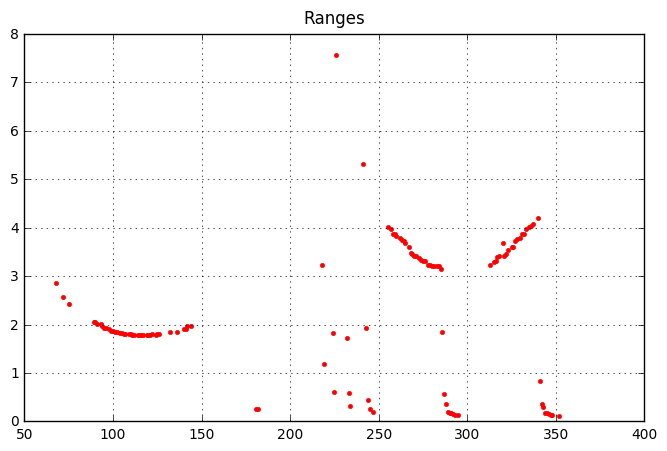

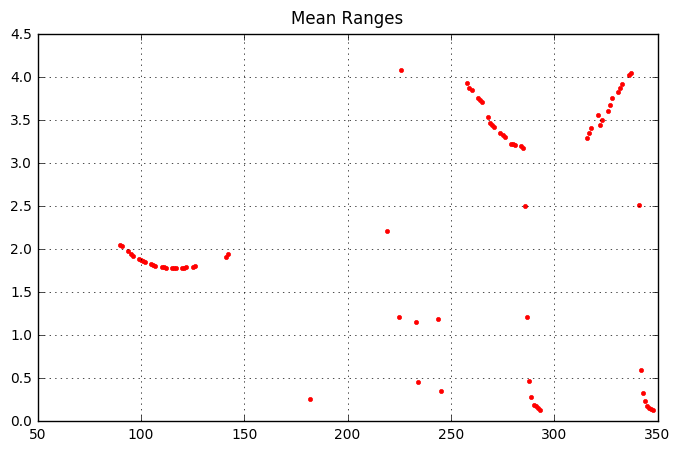

In [348]:
ranges = [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.8575000762939453, inf, inf, inf, 2.5647499561309814, inf, inf, 2.421250104904175, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.0537500381469727, 2.0532500743865967, 2.015500068664551, inf, 2.0027499198913574, 1.9667500257492065, 1.9322500228881836, 1.9197499752044678, inf, 1.9084999561309814, 1.875749945640564, 1.8767499923706055, 1.846500039100647, 1.8454999923706055, inf, 1.8312499523162842, 1.8250000476837158, 1.8147499561309814, 1.8012499809265137, inf, 1.7972500324249268, 1.7972500324249268, 1.78725004196167, 1.783750057220459, inf, 1.784000039100647, 1.780750036239624, 1.784000039100647, 1.781749963760376, inf, 1.7822500467300415, 1.783750057220459, 1.7834999561309814, 1.7999999523162842, inf, 1.778499960899353, 1.8022500276565552, 1.8055000305175781, inf, inf, inf, inf, inf, 1.8522499799728394, inf, inf, inf, 1.8545000553131104, inf, inf, inf, 1.912750005722046, 1.9112499952316284, 1.966249942779541, inf, 1.9667500257492065, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.257750004529953, 0.25999999046325684, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.23799991607666, 1.1762499809265137, inf, inf, inf, inf, 1.8209999799728394, 0.6000000238418579, 7.556000232696533, inf, inf, inf, inf, inf, 1.7137500047683716, 0.596750020980835, 0.3095000088214874, inf, inf, inf, inf, inf, inf, 5.3142499923706055, inf, 1.9329999685287476, 0.4494999945163727, 0.26124998927116394, inf, 0.20475000143051147, inf, inf, inf, inf, inf, inf, inf, 4.02400016784668, inf, 3.970249891281128, 3.878999948501587, 3.872499942779541, 3.8227500915527344, inf, 3.779750108718872, 3.7360000610351562, 3.726249933242798, 3.683500051498413, inf, 3.5985000133514404, 3.467250108718872, 3.461750030517578, 3.422499895095825, 3.4110000133514404, inf, 3.372999906539917, 3.3375000953674316, 3.3067500591278076, 3.3052499294281006, inf, 3.227250099182129, 3.2209999561309814, 3.2190001010894775, 3.208750009536743, inf, 3.2047500610351562, 3.2012500762939453, 3.150749921798706, 1.8485000133514404, 0.5764999985694885, 0.3634999990463257, 0.20424999296665192, 0.18449999392032623, 0.16725000739097595, 0.15324999392032623, 0.12325000017881393, inf, 0.13199999928474426, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.228749990463257, inf, 3.281749963760376, 3.3112499713897705, 3.3984999656677246, 3.407749891281128, inf, 3.6882500648498535, 3.4237499237060547, 3.4590001106262207, 3.530750036239624, inf, 3.601749897003174, 3.6112499237060547, 3.7304999828338623, 3.7715001106262207, inf, 3.7855000495910645, 3.8627500534057617, 3.877500057220459, 3.96875, inf, 4.013500213623047, 4.024750232696533, 4.071750164031982, inf, inf, 4.190999984741211, 0.8309999704360962, 0.35624998807907104, 0.3019999861717224, 0.18125000596046448, 0.1665000021457672, 0.15150000154972076, 0.14124999940395355, 0.12300000339746475, inf, inf, inf, 0.1197500005364418, inf, inf, inf, inf, inf, inf, inf]
mean_ranges = []
for i in xrange(len(ranges)):
    if i == 0:
        mean_ranges.append((ranges[len(ranges)-1] + ranges[i] + ranges[i+1])/3)
    elif i == len(ranges):
        mean_ranges.append(np.mean([ranges[0], ranges[i-1:i]]))
    else:
        mean_ranges.append(np.mean(ranges[i-1:i+1]))
          
                
                
plot_ranges(ranges, 'Ranges')
plot_ranges(mean_ranges, 'Mean Ranges')

In [349]:
ranges = [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.8575000762939453, inf, inf, inf, 2.5647499561309814, inf, inf, 2.421250104904175, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.0537500381469727, 2.0532500743865967, 2.015500068664551, inf, 2.0027499198913574, 1.9667500257492065, 1.9322500228881836, 1.9197499752044678, inf, 1.9084999561309814, 1.875749945640564, 1.8767499923706055, 1.846500039100647, 1.8454999923706055, inf, 1.8312499523162842, 1.8250000476837158, 1.8147499561309814, 1.8012499809265137, inf, 1.7972500324249268, 1.7972500324249268, 1.78725004196167, 1.783750057220459, inf, 1.784000039100647, 1.780750036239624, 1.784000039100647, 1.781749963760376, inf, 1.7822500467300415, 1.783750057220459, 1.7834999561309814, 1.7999999523162842, inf, 1.778499960899353, 1.8022500276565552, 1.8055000305175781, inf, inf, inf, inf, inf, 1.8522499799728394, inf, inf, inf, 1.8545000553131104, inf, inf, inf, 1.912750005722046, 1.9112499952316284, 1.966249942779541, inf, 1.9667500257492065, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.257750004529953, 0.25999999046325684, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.23799991607666, 1.1762499809265137, inf, inf, inf, inf, 1.8209999799728394, 0.6000000238418579, 7.556000232696533, inf, inf, inf, inf, inf, 1.7137500047683716, 0.596750020980835, 0.3095000088214874, inf, inf, inf, inf, inf, inf, 5.3142499923706055, inf, 1.9329999685287476, 0.4494999945163727, 0.26124998927116394, inf, 0.20475000143051147, inf, inf, inf, inf, inf, inf, inf, 4.02400016784668, inf, 3.970249891281128, 3.878999948501587, 3.872499942779541, 3.8227500915527344, inf, 3.779750108718872, 3.7360000610351562, 3.726249933242798, 3.683500051498413, inf, 3.5985000133514404, 3.467250108718872, 3.461750030517578, 3.422499895095825, 3.4110000133514404, inf, 3.372999906539917, 3.3375000953674316, 3.3067500591278076, 3.3052499294281006, inf, 3.227250099182129, 3.2209999561309814, 3.2190001010894775, 3.208750009536743, inf, 3.2047500610351562, 3.2012500762939453, 3.150749921798706, 1.8485000133514404, 0.5764999985694885, 0.3634999990463257, 0.20424999296665192, 0.18449999392032623, 0.16725000739097595, 0.15324999392032623, 0.12325000017881393, inf, 0.13199999928474426, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.228749990463257, inf, 3.281749963760376, 3.3112499713897705, 3.3984999656677246, 3.407749891281128, inf, 3.6882500648498535, 3.4237499237060547, 3.4590001106262207, 3.530750036239624, inf, 3.601749897003174, 3.6112499237060547, 3.7304999828338623, 3.7715001106262207, inf, 3.7855000495910645, 3.8627500534057617, 3.877500057220459, 3.96875, inf, 4.013500213623047, 4.024750232696533, 4.071750164031982, inf, inf, 4.190999984741211, 0.8309999704360962, 0.35624998807907104, 0.3019999861717224, 0.18125000596046448, 0.1665000021457672, 0.15150000154972076, 0.14124999940395355, 0.12300000339746475, inf, inf, inf, 0.1197500005364418, inf, inf, inf, inf, inf, inf, inf]
mean_ranges = []
for i in xrange(len(ranges)):
    if i == 0:
        mean_ranges.append((ranges[len(ranges)-1] + ranges[i] + ranges[i+1])/3)
    elif i == len(ranges):
        mean_ranges.append(np.mean([ranges[0], ranges[i-1:i]]))
    else:
        mean_ranges.append(np.mean(ranges[i-1:i+1]))
          

                           

In [350]:
ranges = [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.8575000762939453, inf, inf, inf, 2.5647499561309814, inf, inf, 2.421250104904175, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.0537500381469727, 2.0532500743865967, 2.015500068664551, inf, 2.0027499198913574, 1.9667500257492065, 1.9322500228881836, 1.9197499752044678, inf, 1.9084999561309814, 1.875749945640564, 1.8767499923706055, 1.846500039100647, 1.8454999923706055, inf, 1.8312499523162842, 1.8250000476837158, 1.8147499561309814, 1.8012499809265137, inf, 1.7972500324249268, 1.7972500324249268, 1.78725004196167, 1.783750057220459, inf, 1.784000039100647, 1.780750036239624, 1.784000039100647, 1.781749963760376, inf, 1.7822500467300415, 1.783750057220459, 1.7834999561309814, 1.7999999523162842, inf, 1.778499960899353, 1.8022500276565552, 1.8055000305175781, inf, inf, inf, inf, inf, 1.8522499799728394, inf, inf, inf, 1.8545000553131104, inf, inf, inf, 1.912750005722046, 1.9112499952316284, 1.966249942779541, inf, 1.9667500257492065, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.257750004529953, 0.25999999046325684, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.23799991607666, 1.1762499809265137, inf, inf, inf, inf, 1.8209999799728394, 0.6000000238418579, 7.556000232696533, inf, inf, inf, inf, inf, 1.7137500047683716, 0.596750020980835, 0.3095000088214874, inf, inf, inf, inf, inf, inf, 5.3142499923706055, inf, 1.9329999685287476, 0.4494999945163727, 0.26124998927116394, inf, 0.20475000143051147, inf, inf, inf, inf, inf, inf, inf, 4.02400016784668, inf, 3.970249891281128, 3.878999948501587, 3.872499942779541, 3.8227500915527344, inf, 3.779750108718872, 3.7360000610351562, 3.726249933242798, 3.683500051498413, inf, 3.5985000133514404, 3.467250108718872, 3.461750030517578, 3.422499895095825, 3.4110000133514404, inf, 3.372999906539917, 3.3375000953674316, 3.3067500591278076, 3.3052499294281006, inf, 3.227250099182129, 3.2209999561309814, 3.2190001010894775, 3.208750009536743, inf, 3.2047500610351562, 3.2012500762939453, 3.150749921798706, 1.8485000133514404, 0.5764999985694885, 0.3634999990463257, 0.20424999296665192, 0.18449999392032623, 0.16725000739097595, 0.15324999392032623, 0.12325000017881393, inf, 0.13199999928474426, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.228749990463257, inf, 3.281749963760376, 3.3112499713897705, 3.3984999656677246, 3.407749891281128, inf, 3.6882500648498535, 3.4237499237060547, 3.4590001106262207, 3.530750036239624, inf, 3.601749897003174, 3.6112499237060547, 3.7304999828338623, 3.7715001106262207, inf, 3.7855000495910645, 3.8627500534057617, 3.877500057220459, 3.96875, inf, 4.013500213623047, 4.024750232696533, 4.071750164031982, inf, inf, 4.190999984741211, 0.8309999704360962, 0.35624998807907104, 0.3019999861717224, 0.18125000596046448, 0.1665000021457672, 0.15150000154972076, 0.14124999940395355, 0.12300000339746475, inf, inf, inf, 0.1197500005364418, inf, inf, inf, inf, inf, inf, inf]

# toss out outliers based on number of neighboring nan values
def plot_ok_ranges(ranges, title):
          
    ok_ranges = []
    for i in xrange(len(ranges)):
        if i < 2 or i == len(ranges):
            ok_ranges.append(ranges[i])
        else:
            if not sum(np.isnan(ranges[i-2:i+2])) > 1:
                ok_ranges.append(ranges[i])
            else:
                ok_ranges.append(inf)    
        
    plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    ax.plot(xrange(len(ranges)), ranges, '.r')
    ax.plot(xrange(len(ranges)), ok_ranges, '.b')
    ax.grid(True)
    ax.set_title(title, va='bottom')

    

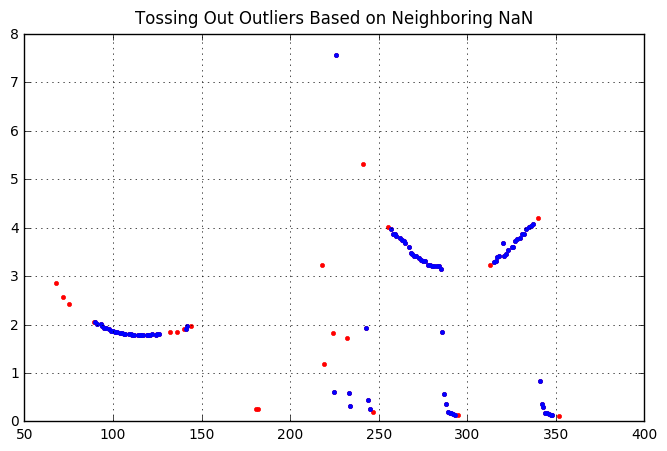

In [351]:
plot_ok_ranges(ranges, 'Tossing Out Outliers Based on Neighboring NaN')

360


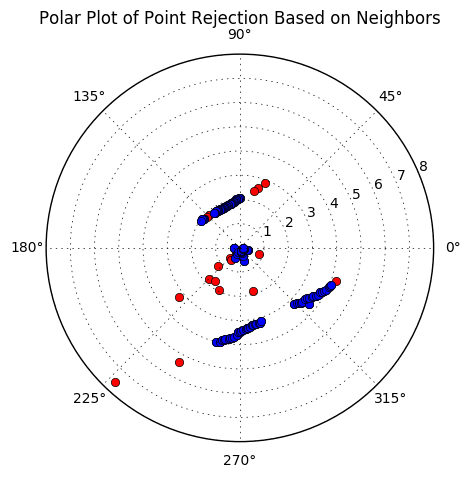

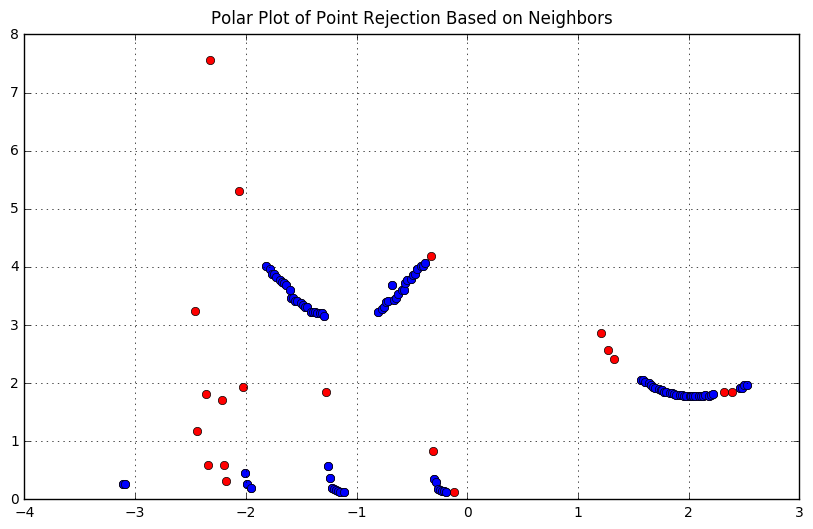

In [352]:
ranges = scan.ranges
angles = generate_scan_angles(scan.angle_min, scan.angle_max, scan.angle_increment, yaw_offset=math.pi)

          
ok_ranges = []
tolerance = 0.25
# window = 3 # number of neighboring points to check left and right



for i in xrange(len(ranges)):
    if i < 2 or i >= len(ranges)-2:
        ok_ranges.append(ranges[i])
    else:
        if abs(ranges[i] - ranges[i-2]) < tolerance \
        or abs(ranges[i] - ranges[i-1]) < tolerance \
        or abs(ranges[i] - ranges[i+1]) < tolerance \
        or abs(ranges[i] - ranges[i+2]) < tolerance:
            ok_ranges.append(ranges[i])
        else:
            ok_ranges.append(inf)  
            
print len(ok_ranges)

plt.figure(figsize=(5,5))
ax = plt.subplot(111, polar=True)
ax.plot(angles, ranges, 'or')
ax.plot(angles, ok_ranges, 'ob')
ax.grid(True)
ax.set_title('Polar Plot of Point Rejection Based on Neighbors', va='bottom')

plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(angles, ranges, 'or')
ax.plot(angles, ok_ranges, 'ob')
ax.grid(True)
ax.set_title('Polar Plot of Point Rejection Based on Neighbors', va='bottom')

